# Data Preprocessing and EDA - Visual Analytics Project

This notebook provides a exploratory data analysis and preprocessing.


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Data

In [3]:
df = pd.read_csv("../../data/spotify-2023.csv", encoding='latin 1')

print(f"Data loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Index AS: {df.shape[0] * df.shape[1]}")
# As we want to have a better view of the data we traspose it
df.head().T


Data loaded: 953 rows × 24 columns
Index AS: 22872


,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84


# 3. Initial Data Inspection

In [4]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

print("Data Types:")
print(df.dtypes.value_counts())

print("\nColumns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col} ({df[col].dtype})")


DATASET OVERVIEW
Data Types:
int64     17
object     7
Name: count, dtype: int64

Columns:
   1. track_name (object)
   2. artist(s)_name (object)
   3. artist_count (int64)
   4. released_year (int64)
   5. released_month (int64)
   6. released_day (int64)
   7. in_spotify_playlists (int64)
   8. in_spotify_charts (int64)
   9. streams (object)
   10. in_apple_playlists (int64)
   11. in_apple_charts (int64)
   12. in_deezer_playlists (object)
   13. in_deezer_charts (int64)
   14. in_shazam_charts (object)
   15. bpm (int64)
   16. key (object)
   17. mode (object)
   18. danceability_% (int64)
   19. valence_% (int64)
   20. energy_% (int64)
   21. acousticness_% (int64)
   22. instrumentalness_% (int64)
   23. liveness_% (int64)
   24. speechiness_% (int64)


In [5]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Some problems:
The columns **streams,in_deezer_plalists and in_zhazam_charts** they must be numerical but are atributed to be strings

In [6]:
def is_number(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

print(df.streams[~df.streams.apply(is_number)])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [7]:
print(df.in_deezer_playlists[~df.in_deezer_playlists.apply(is_number)])

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object


In [190]:
print(df.in_shazam_charts[~df.in_shazam_charts.apply(is_number)])


12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object


The problem with this columns are:

- Streams: There is an incorrect value at index 547. We'll impute this value with the mean.
- in_deezer_playlists: It uses a comma-separated format for thousands.
- in_shazam_charts: It uses a comma-separated format for thousands.

In [8]:
# In this first part what we are doing is ensure that all the values at the column stream are numbers
df['streams'] = df['streams'].apply(lambda val: int(val) if is_number(val) else np.nan)
df['streams'] = df['streams'].fillna(df['streams'].mean()).astype(np.int64)

# For the problem in the following two columns what we are going to do is replace the ,
df.in_shazam_charts = df.in_shazam_charts.apply(
    lambda val: int(val.replace(',','')) if isinstance(val, str) else np.nan)

df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(
    lambda val: int(val.replace(',', '')) if isinstance(val, str) else val
)

In [9]:
# Know we ensure that the columns are correct
print(df.streams[~df.streams.apply(is_number)])
print(df.in_deezer_playlists[~df.in_deezer_playlists.apply(is_number)])
print(df.in_shazam_charts[~df.in_shazam_charts.apply(is_number)])


Series([], Name: streams, dtype: int64)
Series([], Name: in_deezer_playlists, dtype: int64)
Series([], Name: in_shazam_charts, dtype: float64)


# 4. Missing Values Analysis

In [10]:
# Calculate missing values
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing) == 0:
    print(" No missing values found!")
else:
    print(f"Found missing values in {len(missing)} columns:\n")

display(missing)

Found missing values in 2 columns:



,Column,Missing_Count,Missing_Percentage
key,key,95,9.97
in_shazam_charts,in_shazam_charts,50,5.25


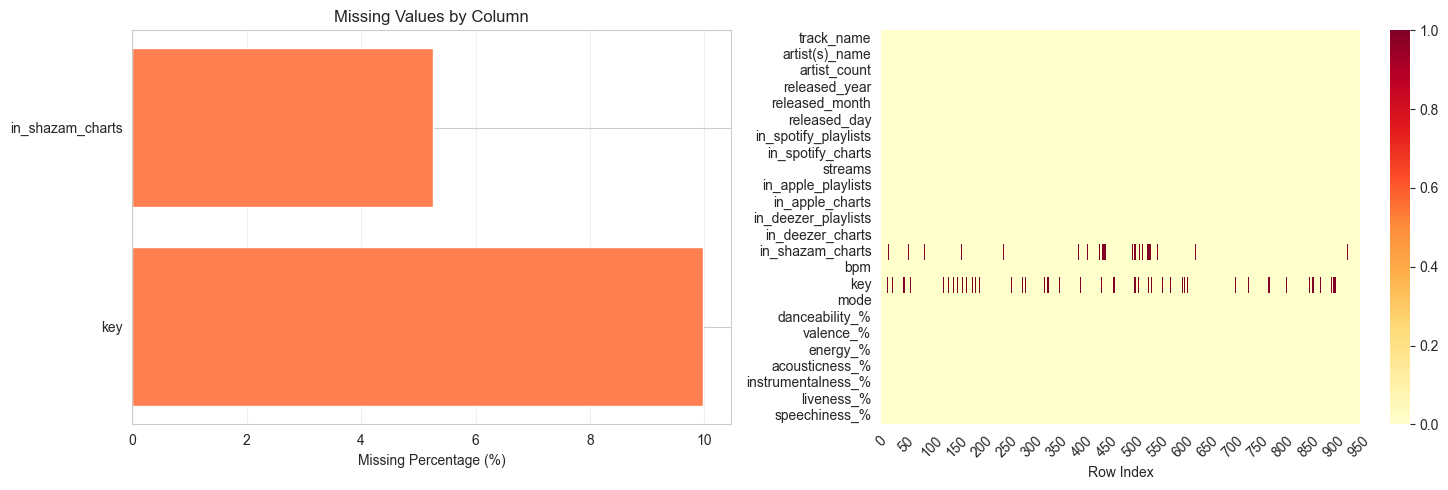

In [194]:
# Visualize missing values
if len(missing) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart
    ax1.barh(missing['Column'], missing['Missing_Percentage'], color='coral')
    ax1.set_xlabel('Missing Percentage (%)')
    ax1.set_title('Missing Values by Column')
    ax1.grid(axis='x', alpha=0.3)
    
    # Heatmap 
    # look this part because the x axis is not good enough I think. 
    sns.heatmap(df.isnull().T, cbar=True, ax=ax2, cmap='YlOrRd', yticklabels=True)

    step = 50  # show every 50th row 
    ax2.set_xticks(range(0, len(df), step))
    ax2.set_xticklabels(df.index[::step], rotation=45)
    ax2.set_xlabel("Row Index")


        
    plt.tight_layout()
    plt.show()

### Handle Missing Values


In [195]:
# Handle 'key' - categorical with 'Unknown' as meaningful category
df['key'] = df['key'].fillna('Unknown')
df['key_detected'] = (df['key'] != 'Unknown').astype(int)

# Handle 'in_shazam_charts' - numeric count, 0 = not tracked
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)
df['shazam_tracked'] = (df['in_shazam_charts'] > 0).astype(int)

# Verify
print(f"Missing: {df['key'].isnull().sum()}, {df['in_shazam_charts'].isnull().sum()}")

Missing: 0, 0


# 5 Descriptive Statisticas

In [196]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
key_detected              int32
shazam_tracked            int32
dtype: object

In [197]:
import pandas as pd

data_description = pd.DataFrame({
    'Type': df.dtypes,
    'Qualitative/Quantitative': [
        'Qualitative' if pd.api.types.is_object_dtype(dtype) or 'released' in col
        else 'Quantitative'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Uniques': [
        df[col].nunique() if pd.api.types.is_object_dtype(dtype) else '-'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Min': [
        df[col].min() if pd.api.types.is_numeric_dtype(dtype) else '-'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Max': [
        df[col].max() if pd.api.types.is_numeric_dtype(dtype) else '-'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Avg': [
        round(df[col].mean(), 2) if pd.api.types.is_numeric_dtype(dtype) else '-'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Std': [
        round(df[col].std(), 2) if pd.api.types.is_numeric_dtype(dtype) else '-'
        for col, dtype in zip(df.columns, df.dtypes)
    ],
    'Missing': [df[col].isnull().sum() for col in df.columns]
}).sort_values(by='Qualitative/Quantitative')

data_description


,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
track_name,object,Qualitative,943,-,-,-,-,0
artist(s)_name,object,Qualitative,645,-,-,-,-,0
released_year,int64,Qualitative,-,1930,2023,2018.24,11.12,0
released_month,int64,Qualitative,-,1,12,6.03,3.57,0
released_day,int64,Qualitative,-,1,31,13.93,9.2,0
mode,object,Qualitative,2,-,-,-,-,0
key,object,Qualitative,12,-,-,-,-,0
speechiness_%,int64,Quantitative,-,2,64,10.13,9.91,0
liveness_%,int64,Quantitative,-,3,97,18.21,13.71,0
instrumentalness_%,int64,Quantitative,-,0,91,1.58,8.41,0


- We have four categorical variables, all measured at the nominal level, The audio features -- instrumentalness,acousticness, energy, valence, danceability, liveness and speechines are percentages with no apparent outliers, the maximux values appear to be 97%. The variable 'bpm' ranges from 65 to 206, which are typical values for this feature

- The released date ranges from 1930 to 2023 and seems to include all months and all days of the month

- The streaming statistics features, including "streams" as well as the number of playlists and charts featuring the song across different platforms, appear to have consistens ranges without any outlier

- The categorial 'Key' feature includes all 12 common western music scales and the 2 common 'mode'

- Out of the 943 popular song on spotify there are 645 unique artists, indicating that some artist have more than one popular song within this list

# 6. Distribution analysis

In [200]:
# This part is important to make it better, we have to make good plots having in count different aspects like the width of the bars...

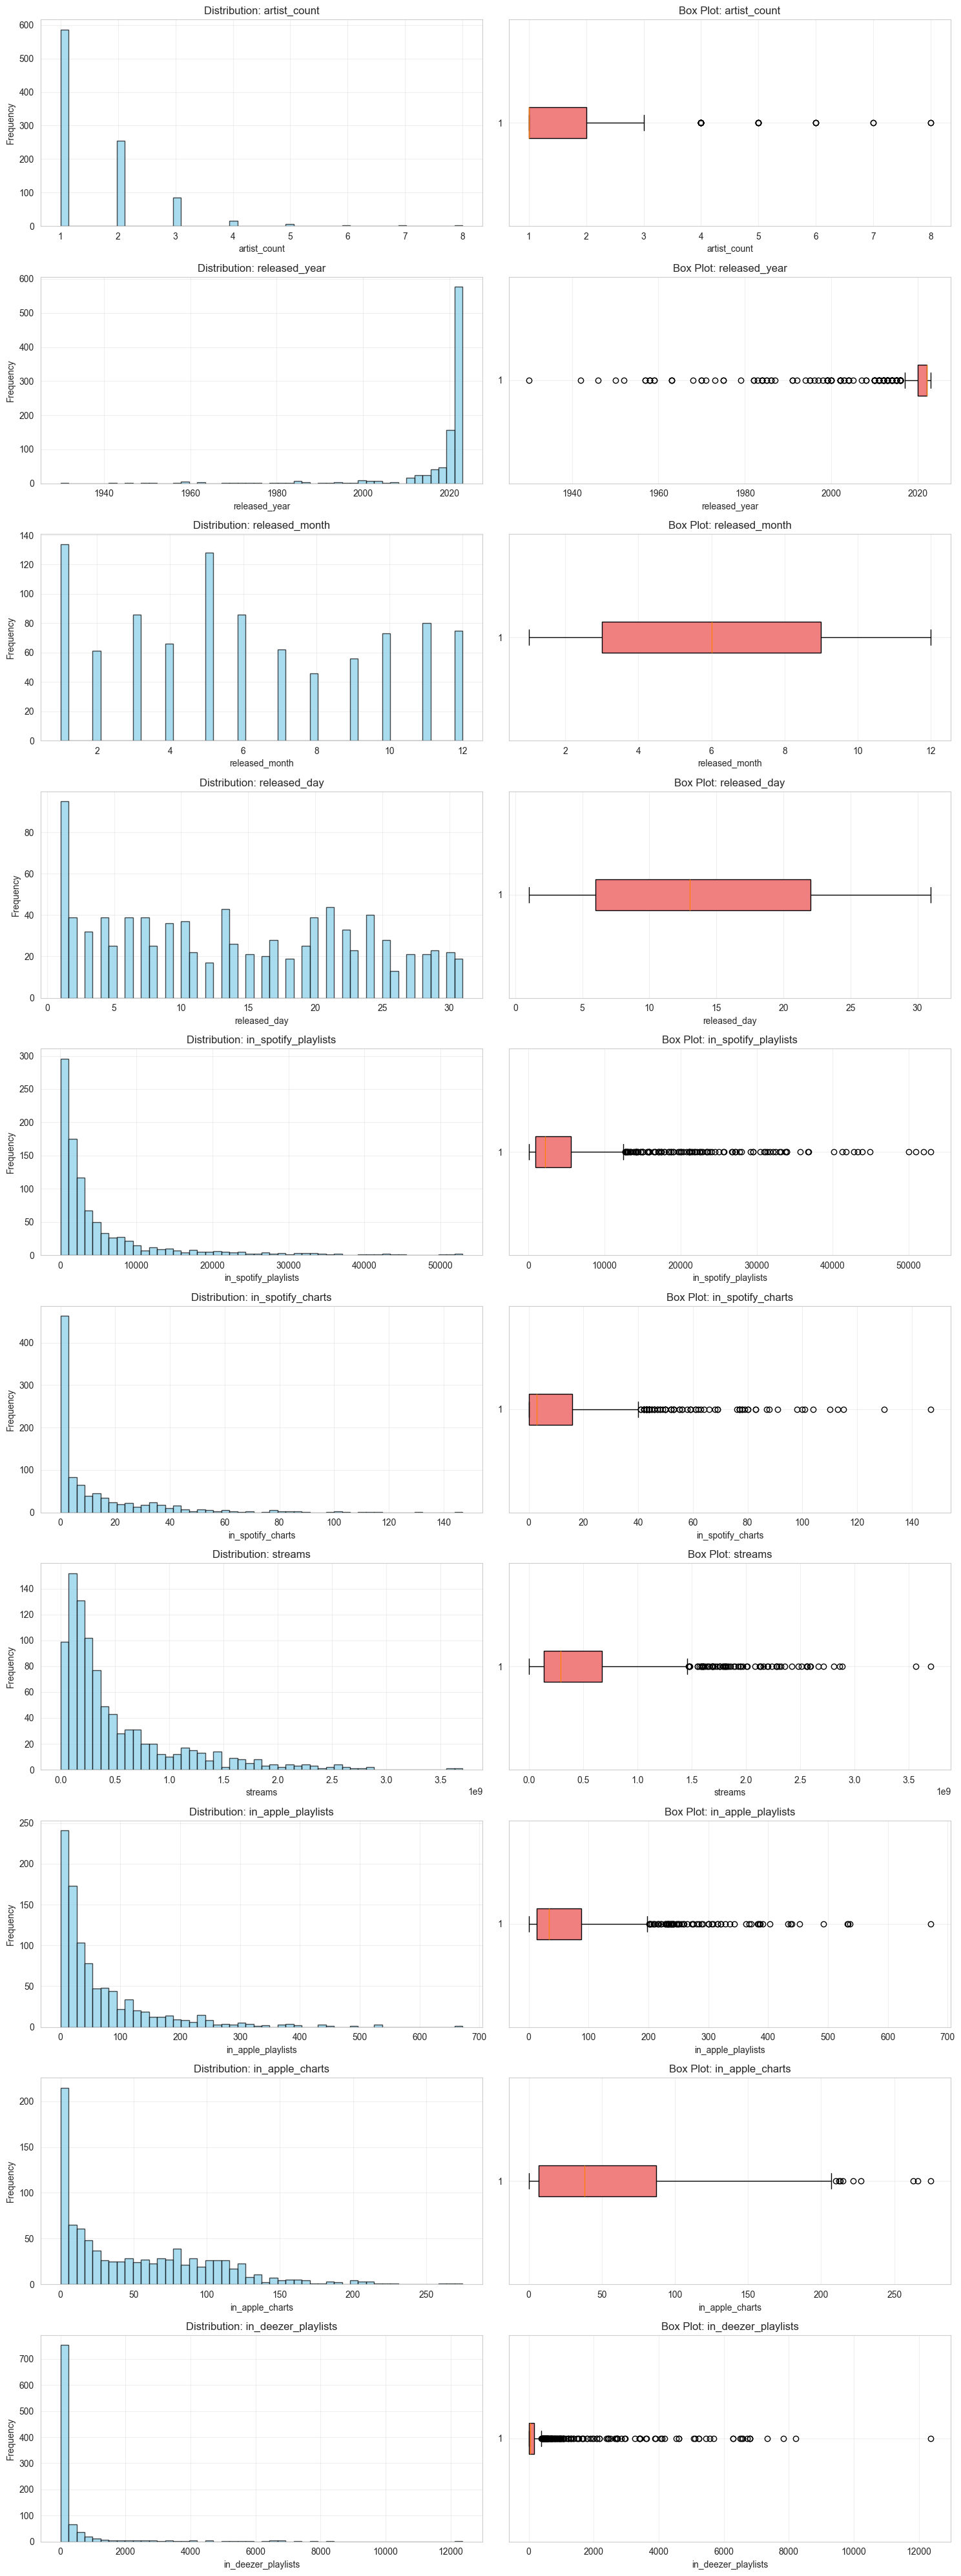

In [199]:
# Plot distributions for numerical columns
df_clean = df.copy()
num_cols = df_clean.select_dtypes(include=[np.number]).columns
max_plots = min(len(num_cols), 10)  # Limit to first 10

if max_plots > 0:
    fig, axes = plt.subplots(max_plots, 2, figsize=(15, 4*max_plots))
    if max_plots == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(num_cols[:max_plots]):
        # Histogram
        axes[idx, 0].hist(df_clean[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx, 0].set_title(f'Distribution: {col}')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].grid(alpha=0.3)
        
        # Box plot
        bp = axes[idx, 1].boxplot(df_clean[col].dropna(), vert=False, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightcoral')
        axes[idx, 1].set_title(f'Box Plot: {col}')
        axes[idx, 1].set_xlabel(col)
        axes[idx, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot")

# 7. Outlier Detection

In [201]:
# Detect outliers using IQR method
# This method was sawn in class
method = 'iqr'  
threshold = 1.5  

num_cols = df_clean.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in num_cols:
    if method == 'iqr':
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(df_clean[col].dropna()))
        outliers = (z_scores > threshold).sum()
    
    if outliers > 0:
        outlier_summary.append({
            'Column': col,
            'Outliers': outliers,
            'Percentage': f"{(outliers/len(df_clean)*100):.2f}%"
        })

if outlier_summary:
    print(f" Found outliers in {len(outlier_summary)} columns:\n")
    display(pd.DataFrame(outlier_summary))
else:
    print(" No significant outliers detected")

 Found outliers in 17 columns:



,Column,Outliers,Percentage
0,artist_count,27,2.83%
1,released_year,151,15.84%
2,in_spotify_playlists,109,11.44%
3,in_spotify_charts,78,8.18%
4,streams,74,7.76%
5,in_apple_playlists,78,8.18%
6,in_apple_charts,9,0.94%
7,in_deezer_playlists,154,16.16%
8,in_deezer_charts,143,15.01%
9,in_shazam_charts,145,15.22%


In [202]:
# Decide whether to handle outliers
# Options: 'cap' (winsorize), 'remove', 'log_transform', 'keep'
handle_method = 'keep'  

df_final = df_clean.copy()

if handle_method == 'cap':
    for col in num_cols:
        Q1 = df_final[col].quantile(0.25)
        Q3 = df_final[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_final[col] = df_final[col].clip(lower=lower_bound, upper=upper_bound)
    print("Outliers capped (winsorized)")

elif handle_method == 'remove':
    for col in num_cols:
        Q1 = df_final[col].quantile(0.25)
        Q3 = df_final[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
    print(f"Outliers removed: {df_clean.shape} → {df_final.shape}")

elif handle_method == 'log_transform':
    for col in num_cols:
        if (df_final[col] > 0).all():
            df_final[col] = np.log1p(df_final[col])
    print("Log transformation applied to positive columns")

else:
    print(" Keeping outliers as-is")

 Keeping outliers as-is


# 8. Correlation analysis

In [205]:
# Calculate correlation matrix
num_cols = df_final.select_dtypes(include=[np.number]).columns


corr_matrix = df_final[num_cols].corr()

# Find high correlations
threshold = 0.7
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': f"{corr_matrix.iloc[i, j]:.3f}"
            })

if high_corr:
    print(f"Found {len(high_corr)} highly correlated pairs (|r| > {threshold}):\n")
    display(pd.DataFrame(high_corr))
else:
    print(f"No highly correlated pairs found (threshold: {threshold})")


Found 4 highly correlated pairs (|r| > 0.7):



,Feature 1,Feature 2,Correlation
0,in_spotify_playlists,streams,0.790
1,in_spotify_playlists,in_apple_playlists,0.708
2,in_spotify_playlists,in_deezer_playlists,0.826
3,streams,in_apple_playlists,0.772


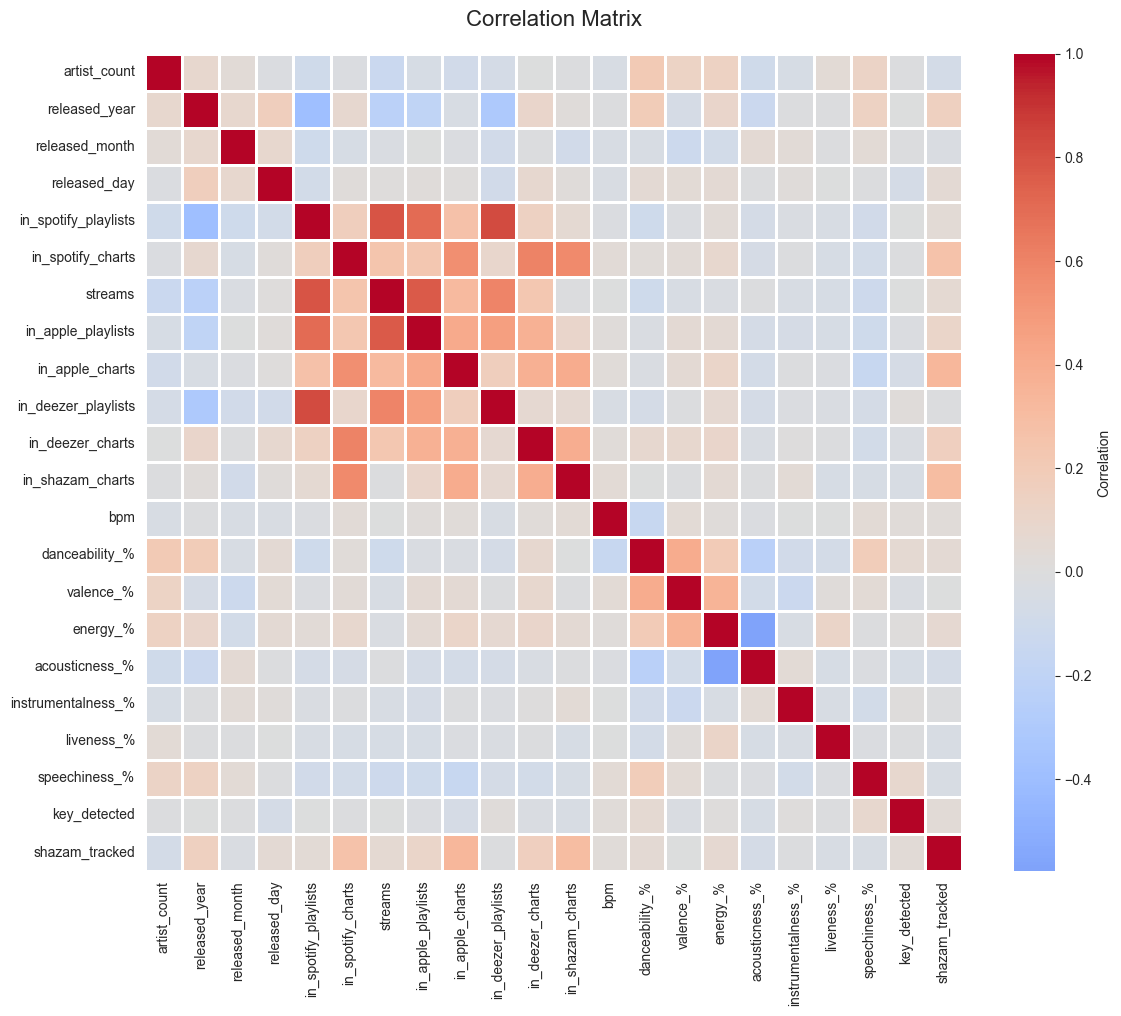

In [206]:
# Visualize correlation matrix
if len(num_cols) >= 2:
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(corr_matrix, 
                annot=annot, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0, 
                square=True, 
                linewidths=1,
                cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

## 9. Data Normalization 

Normalize data for dimensionality reduction technique t-SNE

In [207]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

# ============================================================================
# NORMALIZATION 
# ============================================================================

# Enable normalization
normalize = True  
method = 'standardize'  

if normalize:
    # Get numerical columns
    num_cols = df_final.select_dtypes(include=[np.number]).columns
    
    print(f"Normalizing {len(num_cols)} numerical columns")
    print(f"Method: {method}")
    
    # Choose scaler
    if method == 'standardize':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    
    # Create normalized dataframe
    df_normalized = df_final.copy()
    df_normalized[num_cols] = scaler.fit_transform(df_final[num_cols])
    
    print(f"\n Data normalized using '{method}' method for {len(num_cols)} columns")
    
    # Show before/after comparison
    print("\n" + "="*80)
    print("BEFORE NORMALIZATION:")
    print("="*80)
    print(df_final[num_cols].describe().round(2).loc[['mean', 'std', 'min', 'max']])
    
    print("\n" + "="*80)
    print("AFTER NORMALIZATION:")
    print("="*80)
    print(df_normalized[num_cols].describe().round(2).loc[['mean', 'std', 'min', 'max']])
    
    # Verify normalization worked correctly
    print("\n" + "="*80)
    print("VERIFICATION:")
    print("="*80)
    
    if method == 'standardize':
        # StandardScaler should give mean ≈ 0, std ≈ 1
        means = df_normalized[num_cols].mean()
        stds = df_normalized[num_cols].std()
        print(f"Mean range: [{means.min():.6f}, {means.max():.6f}] (should be ≈ 0)")
        print(f"Std range: [{stds.min():.2f}, {stds.max():.2f}] (should be ≈ 1)")
        
    elif method == 'minmax':
        # MinMaxScaler should give min = 0, max = 1
        mins = df_normalized[num_cols].min()
        maxs = df_normalized[num_cols].max()
        print(f"Min range: [{mins.min():.2f}, {mins.max():.2f}] (should be 0)")
        print(f"Max range: [{maxs.min():.2f}, {maxs.max():.2f}] (should be 1)")
    
    print("\n Normalization complete!")
    print(f"   Original dataframe: df_final")
    print(f"   Normalized dataframe: df_normalized")
    
else:
    df_normalized = df_final.copy()
    print("Skipping normalization")

Normalizing 22 numerical columns
Method: standardize

 Data normalized using 'standardize' method for 22 columns

BEFORE NORMALIZATION:
      artist_count  released_year  released_month  released_day  \
mean          1.56        2018.24            6.03         13.93   
std           0.89          11.12            3.57          9.20   
min           1.00        1930.00            1.00          1.00   
max           8.00        2023.00           12.00         31.00   

      in_spotify_playlists  in_spotify_charts       streams  \
mean               5200.12              12.01  5.141374e+08   
std                7897.61              19.58  5.665592e+08   
min                  31.00               0.00  2.762000e+03   
max               52898.00             147.00  3.703895e+09   

      in_apple_playlists  in_apple_charts  in_deezer_playlists  ...     bpm  \
mean               67.81            51.91               385.19  ...  122.54   
std                86.44            50.63             

# 10. Export cleaned data

In [208]:
# Export cleaned data
output_path = 'cleaned_data.csv'
df_final.to_csv(output_path, index=False)

print(f" Cleaned data exported to: {output_path}")
print(f"  Final shape: {df_final.shape}")
print(f"  Final AS Index: {df_final.shape[0] * df_final.shape[1]:,}")

 Cleaned data exported to: cleaned_data.csv
  Final shape: (953, 26)
  Final AS Index: 24,778


## Next Steps: Dimensionality Reduction

After preprocessing, you'll need to implement dimensionality reduction (MANDATORY requirement).

Common techniques:
- **t-SNE**: Non-linear, good for visualization, preserves local structure